In [ ]:
#pip install xgboost
#!pip install catboost


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight



In [7]:
df=pd.read_excel("Final_Neonatal data.xlsx")

In [8]:
df.shape

(3009, 44)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CardNumber          3009 non-null   int64  
 1   RegistrationDate    3009 non-null   object 
 2   FullName            2999 non-null   object 
 3   Sex                 2993 non-null   object 
 4   Region              3009 non-null   object 
 5   Zone                3009 non-null   object 
 6   Wereda              2996 non-null   object 
 7   Kebele              2996 non-null   float64
 8   AgeInDay            3009 non-null   float64
 9   AgeInHour           3009 non-null   float64
 10  Wight               3009 non-null   float64
 11  Diagnosis           3001 non-null   object 
 12  TotalWBC            3009 non-null   float64
 13  Hemoglobin          3009 non-null   float64
 14  Hematocrit          3009 non-null   float64
 15  Platelet            3009 non-null   float64
 16  BloodR

In [9]:
df.isnull().sum()

CardNumber               0
RegistrationDate         0
FullName                10
Sex                     16
Region                   0
Zone                     0
Wereda                  13
Kebele                  13
AgeInDay                 0
AgeInHour                0
Wight                    0
Diagnosis                8
TotalWBC                 0
Hemoglobin               0
Hematocrit               0
Platelet                 0
BloodRH1                 0
RBS                      0
ESR                      0
CRP                      0
APGARscore             632
Direct                   0
Indirect                 0
Total                    0
Na                       0
Ca                       0
K                        0
Mg                       0
Xray                  2915
US                    2845
EchoCard              2976
CTScan                3000
ManagmentDecision       20
AgeMother                0
Gravidity                0
Parity                   0
BloodRH2                 0
H

In [6]:
drop_cols = [
    'CardNumber', 'FullName', 'Region', 'Zone', 'Wereda', 'Kebele',
    'APGARscore','Xray', 'US', 'EchoCard', 'CTScan', 'Hepatatis',
    'Unnamed: 44', '1'
]

# Filter out columns that do not exist in the DataFrame
existing_drop_cols = [col for col in drop_cols if col in df.columns]

# Drop only the existing columns
d = df.drop(columns=existing_drop_cols)

print(f"Dropped columns: {existing_drop_cols}")
print("Remaining columns:")
print(d.columns.tolist())

Dropped columns: ['CardNumber', 'FullName', 'Region', 'Zone', 'Wereda', 'Kebele', 'APGARscore', 'Xray', 'US', 'EchoCard', 'CTScan', 'Hepatatis']
Remaining columns:
['RegistrationDate', 'Sex', 'AgeInDay', 'AgeInHour', 'Wight', 'Diagnosis', 'TotalWBC', 'Hemoglobin', 'Hematocrit', 'Platelet', 'BloodRH1', 'RBS', 'ESR', 'CRP', 'Direct', 'Indirect', 'Total', 'Na', 'Ca', 'K', 'Mg', 'ManagmentDecision', 'AgeMother', 'Gravidity', 'Parity', 'BloodRH2', 'HIV', 'GestesionalAge', 'PlaceofDeli', 'UDRL', 'DischargeDate', 'DischargeCondition']


In [ ]:
d.to_excel('Final_Neonatal datanew.xlsx', index=False)
d.head()

In [10]:
d=pd.read_excel('Final_Neonatal datanew.xlsx')

In [11]:
d.shape

(3009, 32)

In [12]:
# Check how many samples per class
print(d['DischargeCondition'].value_counts())

DischargeCondition
Improved    2501
Died         368
LAMA         108
Transfer      32
Name: count, dtype: int64


In [13]:
d.drop_duplicates(inplace=True)

In [14]:
d.shape

(1180, 32)

In [15]:
print(d['DischargeCondition'].value_counts())

DischargeCondition
Improved    977
Died        149
LAMA         42
Transfer     12
Name: count, dtype: int64


In [13]:
d.isnull().sum()

RegistrationDate       0
Sex                    6
AgeInDay               0
AgeInHour              0
Wight                  0
Diagnosis              3
TotalWBC               0
Hemoglobin             0
Hematocrit             0
Platelet               0
BloodRH1               0
RBS                    0
ESR                    0
CRP                    0
Direct                 0
Indirect               0
Total                  0
Na                     0
Ca                     0
K                      0
Mg                     0
ManagmentDecision      8
AgeMother              0
Gravidity              0
Parity                 0
BloodRH2               0
HIV                    0
GestesionalAge        27
PlaceofDeli            0
UDRL                  34
DischargeDate          0
DischargeCondition     0
dtype: int64

In [14]:
mode_sex = d['Sex'].mode()[0]
d['Sex'] = d['Sex'].fillna(mode_sex)

In [15]:
mode_diagnosis = d['Diagnosis'].mode()[0]
d['Diagnosis'] = d['Diagnosis'].fillna(mode_diagnosis)

In [16]:
mode_ManagmentDecision = d['ManagmentDecision'].mode()[0]
d['ManagmentDecision'] = d['ManagmentDecision'].fillna(mode_ManagmentDecision)

In [17]:
mode_ManagmentDecision = d['ManagmentDecision'].mode()[0]
d['ManagmentDecision'] = d['ManagmentDecision'].fillna(mode_ManagmentDecision)

In [18]:
mean_GestesionalAge = d['GestesionalAge'].mean()
d['GestesionalAge'] = d['GestesionalAge'].fillna(mean_GestesionalAge)

In [19]:
mean_udrl = d['UDRL'].mean()
d['UDRL'] = d['UDRL'].fillna(mean_udrl)

In [16]:
d.isnull().sum()

RegistrationDate       0
Sex                    6
AgeInDay               0
AgeInHour              0
Wight                  0
Diagnosis              3
TotalWBC               0
Hemoglobin             0
Hematocrit             0
Platelet               0
BloodRH1               0
RBS                    0
ESR                    0
CRP                    0
Direct                 0
Indirect               0
Total                  0
Na                     0
Ca                     0
K                      0
Mg                     0
ManagmentDecision      8
AgeMother              0
Gravidity              0
Parity                 0
BloodRH2               0
HIV                    0
GestesionalAge        27
PlaceofDeli            0
UDRL                  34
DischargeDate          0
DischargeCondition     0
dtype: int64

In [25]:


def clinical_entropy_matched_oversample(
    d,
    target_col,
    total_size=None,
    target_entropy=1.23,
    noise_level=0.02,
    random_state=42
):

    d = d.copy()
    numeric_cols = d.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in numeric_cols:
        numeric_cols.remove(target_col)  # avoid adding noise to target

    counts = d[target_col].value_counts()
    classes = counts.index.tolist()
    freqs = counts.values.astype(float)

    log_freqs = np.log(freqs)

    def entropy(p):
        return -np.sum(p * np.log(p + 1e-9))

    if total_size is None:
        total_size = len(d)

    if target_entropy is None:
        # maximum entropy for current number of classes
        target_entropy = np.log(len(classes))

    # Search temperature
    best_T, best_diff, best_p = None, 1e9, None
    for T in np.linspace(0.1, 5, 5000):
        logits = log_freqs / T
        p = np.exp(logits) / np.exp(logits).sum()
        diff = abs(entropy(p) - target_entropy)
        if diff < best_diff:
            best_T, best_diff, best_p = T, diff, p

    # Final target counts
    targets = dict(zip(classes, (best_p * total_size).astype(int)))

    augmented = [d]

    for cls, target_n in targets.items():
        class_d = d[d[target_col] == cls]
        n_current = len(class_d)

        if target_n <= n_current:
            continue

        n_needed = target_n - n_current
        sampled = class_d.sample(n=n_needed, replace=True, random_state=random_state).copy()

        # Add noise to numeric columns
        for col in numeric_cols:
            std = d[col].std()
            if std > 0:
                sampled[col] += np.random.normal(0, noise_level * std, size=n_needed)

        # Optional: cast integers back if original column is int
        for col in numeric_cols:
            if pd.api.types.is_integer_dtype(d[col]):
                sampled[col] = sampled[col].round().astype(d[col].dtype)

        augmented.append(sampled)

    df_aug = pd.concat(augmented, ignore_index=True)
    df_aug = df_aug.sample(frac=1, random_state=random_state).reset_index(drop=True)
    return df_aug


In [26]:
df_aug = clinical_entropy_matched_oversample(
    d,
    target_col='DischargeCondition',
    total_size=2065,
    target_entropy=1.23,
    noise_level=0.02
)

df_aug.to_excel('Final_Neonatal_data_augmentedml.xlsx', index=False)


In [19]:
df_aug.shape

(2063, 32)

In [20]:
df_aug = clinical_entropy_matched_oversample(
    d,
    target_col='DischargeCondition',
    total_size=2065
)

df_aug['DischargeCondition'].value_counts(normalize=True)

DischargeCondition
Improved    0.482307
Died        0.251091
LAMA        0.161900
Transfer    0.104702
Name: proportion, dtype: float64

In [21]:
print(df_aug['DischargeCondition'].value_counts())

DischargeCondition
Improved    995
Died        518
LAMA        334
Transfer    216
Name: count, dtype: int64


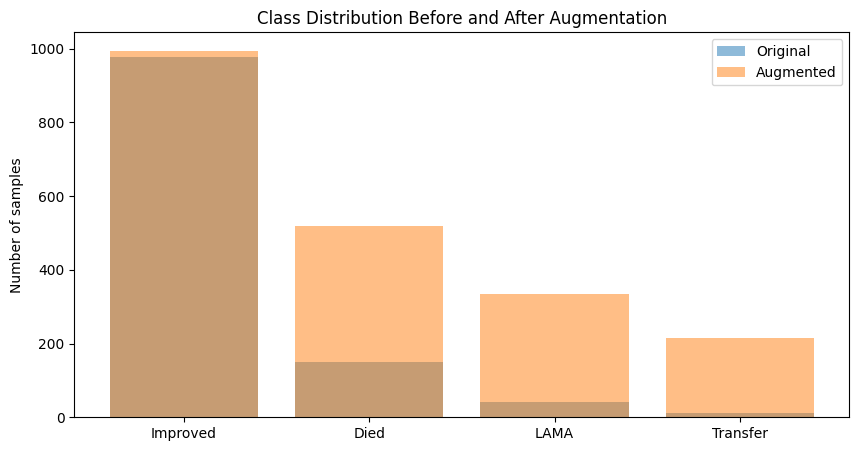

In [47]:
# Before augmentation
original_counts = d['DischargeCondition'].value_counts()

# After augmentation
aug_counts = df_aug['DischargeCondition'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(original_counts.index, original_counts.values, alpha=0.5, label='Original')
plt.bar(aug_counts.index, aug_counts.values, alpha=0.5, label='Augmented')
plt.ylabel('Number of samples')
plt.title('Class Distribution Before and After Augmentation')
plt.legend()
plt.show()


C:\Users\shambel.dessale\AppData\Local\Temp\ipykernel_35800\4044545383.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_encoded[col] = pd.to_datetime(X[col])
C:\Users\shambel.dessale\AppData\Local\Temp\ipykernel_35800\4044545383.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_encoded[col] = pd.to_datetime(X[col])
C:\Users\shambel.dessale\AppData\Local\Temp\ipykernel_35800\4044545383.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_encoded[col] = pd.to_datetime(X[col])
C:\Users\shambel.dessale\AppData\Local\Temp\ipykernel_35800\4044545383.py:21: UserWarnin

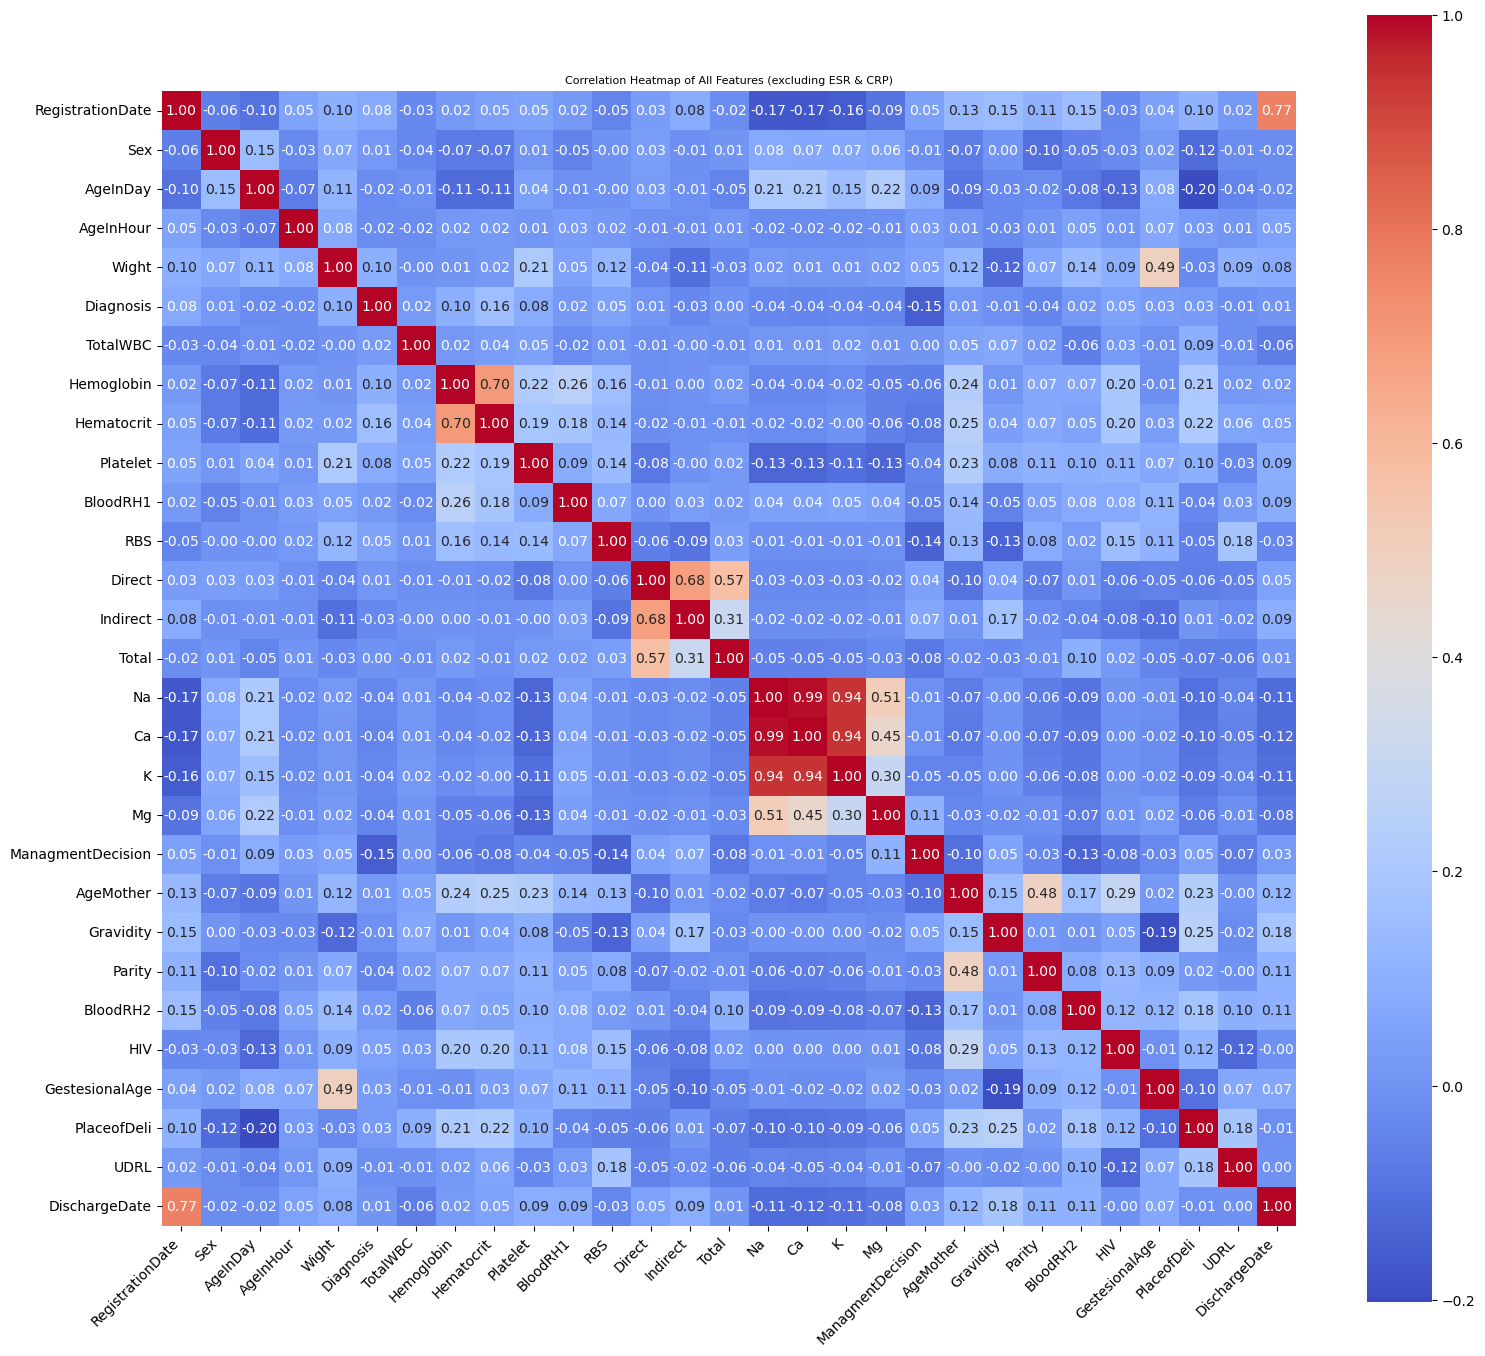

In [22]:
# Copy features
X = df_aug.drop(columns='DischargeCondition')

# List of columns to exclude
exclude_cols = ['ESR', 'CRP']  # add any other columns you want to skip

# Prepare encoded dataframe
X_encoded = pd.DataFrame()

for col in X.columns:
    if col in exclude_cols:
        continue  # skip excluded columns

    # 1️⃣ Handle datetime
    if np.issubdtype(X[col].dtype, np.datetime64):
        X_encoded[col] = (X[col] - X[col].min()).dt.total_seconds()

    # 2️⃣ Handle object columns
    elif X[col].dtype == 'object':
        try:
            X_encoded[col] = pd.to_datetime(X[col])
            X_encoded[col] = (X_encoded[col] - X_encoded[col].min()).dt.total_seconds()
        except:
            X_encoded[col] = LabelEncoder().fit_transform(X[col].astype(str))

    # 3️⃣ Numeric columns
    else:
        X_encoded[col] = X[col]

# Compute correlation matrix
corr = X_encoded.corr()

# Plot heatmap
plt.figure(figsize=(16,14))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of All Features (excluding ESR & CRP)', fontsize=8)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [27]:
df_aug = clinical_entropy_matched_oversample(d, total_size=2067, noise_level=0.02, target_col='DischargeCondition')
print(d.shape, df_aug.shape)

(1180, 32) (2065, 32)


In [28]:
# Features / target
X = df_aug.drop(columns='DischargeCondition')
y = df_aug['DischargeCondition']

# Encode categorical features and convert datetime to numeric
X_encoded = X.copy()
for col in X_encoded.columns:
    if np.issubdtype(X_encoded[col].dtype, 'datetime64[ns]'):
        # Convert datetime to numeric (seconds since min)
        X_encoded[col] = (X_encoded[col] - X_encoded[col].min()).dt.total_seconds()
    elif X_encoded[col].dtype == 'object':
        # Encode categorical columns
        X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col].astype(str))

# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Sanity check: shapes and class distribution
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("\ny_train class distribution:\n", y_train.value_counts(normalize=True))
print("\ny_test class distribution:\n", y_test.value_counts(normalize=True))

X_train shape: (1652, 31)
X_test shape: (413, 31)

y_train class distribution:
 DischargeCondition
Improved    0.482446
Died        0.251211
LAMA        0.161622
Transfer    0.104722
Name: proportion, dtype: float64

y_test class distribution:
 DischargeCondition
Improved    0.481840
Died        0.251816
LAMA        0.162228
Transfer    0.104116
Name: proportion, dtype: float64


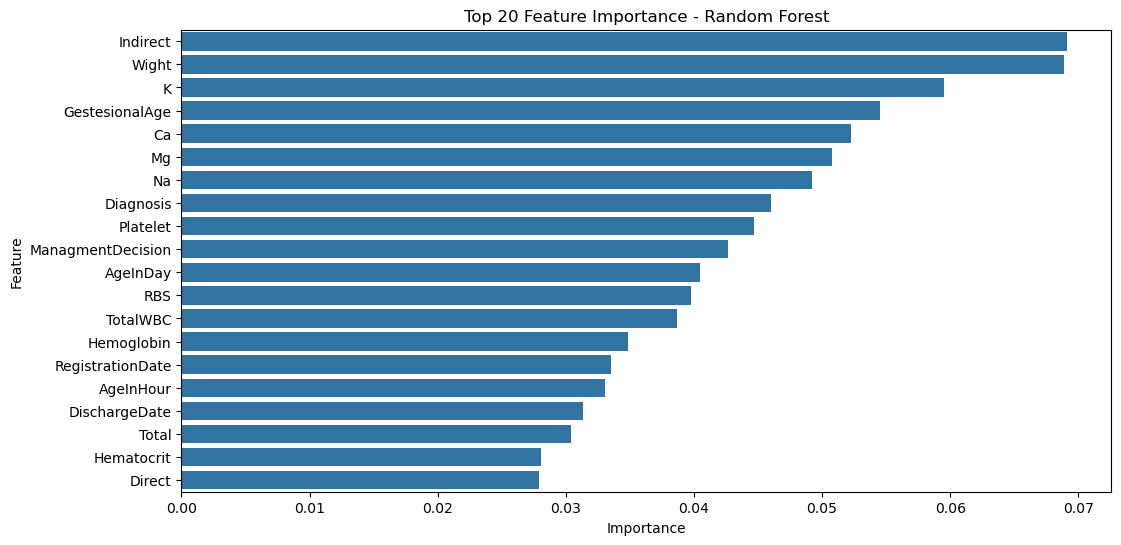

In [29]:
# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit model
rf.fit(X_train, y_train)

# Create a Series of feature importances
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot top 20 features
plt.figure(figsize=(12,6))
sns.barplot(x=feat_imp[:20], y=feat_imp[:20].index)
plt.title("Top 20 Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [30]:
df_aug.shape

(2065, 32)

In [41]:
# Encode target labels as integers, if not already done in this scope
# (This ensures 'le' is defined for num_class and target_names)
le = LabelEncoder()
# Ensure y_train is passed as a Series for fitting LabelEncoder
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    objective='multi:softmax',  # For multi-class classification
    num_class=len(le.classes_), # Number of target classes
    eval_metric='mlogloss',     # Evaluation metric for multi-class
    use_label_encoder=False,    # Suppress deprecation warning
    random_state=42
)

# Train the model and capture evaluation results
xgb_model.fit(
    X_train, y_train_enc,
    eval_set=[(X_train, y_train_enc), (X_test, y_test_enc)], # Evaluation sets
    verbose=False # Set to True for verbose output during training
)

# Retrieve training and testing loss
results = xgb_model.evals_result()
train_loss = results['validation_0']['mlogloss']
test_loss = results['validation_1']['mlogloss']

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Results:\n")
print(classification_report(y_test_enc, y_pred_xgb, target_names=le.classes_))

c:\Users\shambel.dessale\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:37:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results:

              precision    recall  f1-score   support

        Died       0.93      0.88      0.90       104
    Improved       0.91      0.96      0.93       199
        LAMA       0.98      0.93      0.95        67
    Transfer       1.00      0.95      0.98        43

    accuracy                           0.93       413
   macro avg       0.95      0.93      0.94       413
weighted avg       0.93      0.93      0.93       413



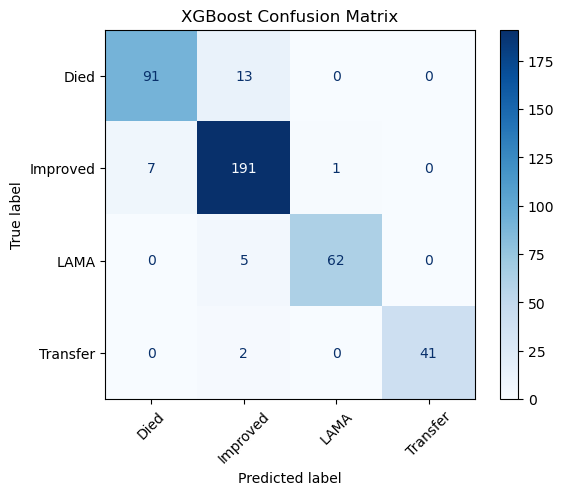

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test_enc, y_pred_xgb, labels=np.arange(len(le.classes_)))
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=le.classes_)
disp_xgb.plot(cmap='Blues', xticks_rotation=45)
plt.title("XGBoost Confusion Matrix")
plt.show()

In [44]:
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='MultiClass',
    eval_metric='TotalF1',
    #eval_metric='AUC',
    auto_class_weights='Balanced',
    early_stopping_rounds=50,
    random_seed=42,
    verbose=100
)
# Add class weights
class_weights = compute_class_weight('balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
class_weights_dict = dict(enumerate(class_weights))

cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0:	learn: 0.5693110	total: 137ms	remaining: 2m 17s
100:	learn: 0.9212831	total: 1.75s	remaining: 15.6s
200:	learn: 0.9545502	total: 3.04s	remaining: 12.1s
300:	learn: 0.9679437	total: 4.55s	remaining: 10.6s
400:	learn: 0.9800923	total: 6.06s	remaining: 9.05s
500:	learn: 0.9858845	total: 7.64s	remaining: 7.61s
600:	learn: 0.9923545	total: 9.48s	remaining: 6.29s
700:	learn: 0.9945016	total: 11s	remaining: 4.71s
800:	learn: 0.9969628	total: 12.9s	remaining: 3.2s
900:	learn: 0.9975652	total: 14.8s	remaining: 1.63s
999:	learn: 0.9987700	total: 16.8s	remaining: 0us
              precision    recall  f1-score   support

        Died       0.90      0.87      0.88       104
    Improved       0.91      0.94      0.92       199
        LAMA       1.00      0.96      0.98        67
    Transfer       0.95      0.95      0.95        43

    accuracy                           0.92       413
   macro avg       0.94      0.93      0.93       413
weighted avg       0.93      0.92      0.92       413
